In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

p1 = pd.read_csv('support4_Part1.csv')
p2 = pd.read_csv('Support4_Part2.csv')
sup = pd.concat([p1,p2])

sup = sup.reset_index(drop=True)
sup['created_time']=pd.to_datetime(sup['created_time'])
sup['solved_time']=pd.to_datetime(sup['solved_time'])
sup


In [2]:

sup.to_csv('support_fixed.csv', index=False)

NameError: name 'sup' is not defined

In [1]:

tr = pd.read_csv('transactions4_(2)_(1).csv')
#tr.drop(columns='Unnamed: 3')
del tr['Unnamed: 3']
tr = tr.dropna()
tr['transactions']=pd.to_datetime(tr['transactions'])

NameError: name 'pd' is not defined

In [13]:
tr.to_csv('transactions.csv', index=False)

<IPython.core.display.Javascript object>


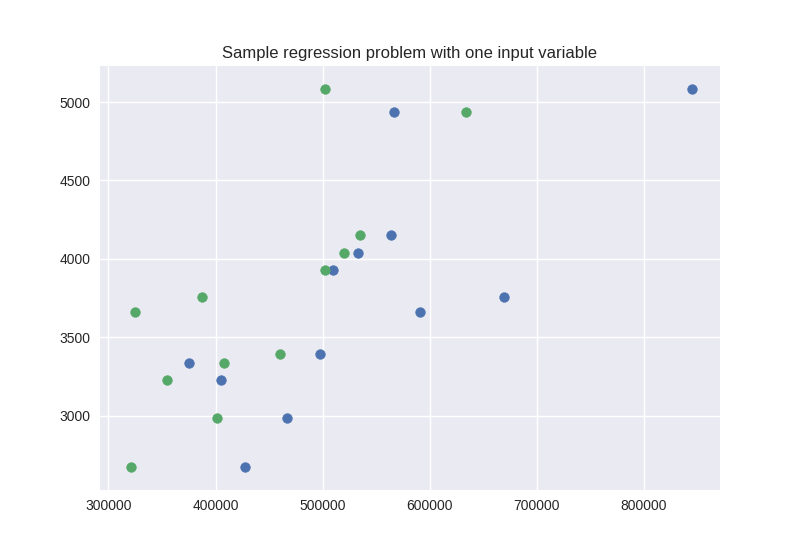

KeyError: 'bookings'

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sc = pd.read_csv('monthly_scatter.csv')
sc
plt.figure()
plt.title('Sample regression problem with one input variable')
sc['date']=pd.to_datetime(sc['date'])
plt.scatter(sc['sum_bookings'], sc['FR_instances'], marker= 'o', s=50)
#plt.scatter(sc['sum_checkins'], sc['FR_instances'], marker= 'o', s=50)
plt.scatter(sc['bookings'], sc['total_FR_assignees'], marker= 'o', s=50)
plt.scatter(sc['bookings'], sc['date'], marker= 'o', s=50)
plt.show()


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


<IPython.core.display.Javascript object>


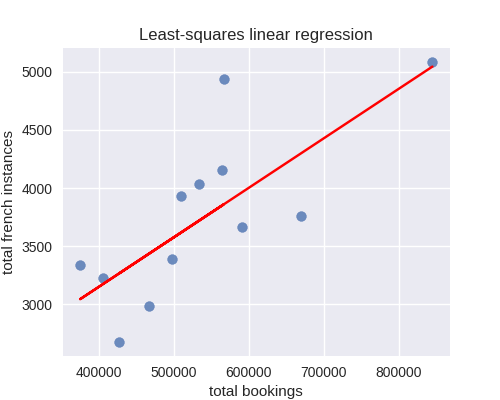

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

bookings = sc['sum_bookings'].reshape(12,1)
#transactions = sc[['sum_bookings', 'sum_checkins']]
FR_instances = sc['FR_instances'].reshape(12,1)
X_train, X_test, y_train, y_test = train_test_split(bookings , FR_instances, test_size = 0.1,
                                                   random_state = 0)


linreg = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(5,4))
plt.scatter(bookings, FR_instances, marker= 'o', s=50, alpha=0.8)
plt.plot(bookings, linreg.coef_ * bookings + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('total bookings')
plt.ylabel('total french instances')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

#bookings = sc['sum_bookings'].reshape(12,1)
transactions = sc[['sum_bookings', 'sum_checkins']]
FR_instances = sc['FR_instances'].reshape(12,1)
X_train, X_test, y_train, y_test = train_test_split(transactions , FR_instances, 
                                                   random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))


linear model coeff (w): [[ 0.00273497  0.0036005 ]]
linear model intercept (b): [ 607.51906938]
R-squared score (training): 0.761
R-squared score (test): 0.504


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [6]:
late17 = pd.read_csv('late_2017.csv')
late17['Date']=pd.to_datetime(late17['Date'])
FR_Inst_predict = linreg.predict(late17[['sum_bookings', 'sum_checkins']])
FR_Inst_predict


,Date,tr_year,tr_month,sum_bookings,sum_checkins
0,2017-01-04,2017,4,930100,687841
1,2017-01-05,2017,5,981139,844227
2,2017-01-06,2017,6,1079676,955096
3,2017-01-07,2017,7,1217506,1113693
4,2017-01-08,2017,8,1214561,1351465
5,2017-01-09,2017,9,1149171,1092538
6,2017-01-10,2017,10,1123656,1072428
7,2017-01-11,2017,11,885486,752234
8,2017-01-12,2017,12,803100,930217
